# Problem statement : To predict species on logistic regression

## 1.Import Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## 2. Data Collection

In [12]:
df = pd.read_csv('E:/ML_Datasets/IRIS.csv')

In [13]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Encoding : For to convert string value into numerical value

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
label = LabelEncoder()
df['species'] = label.fit_transform(df['species'])

In [16]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Check data is balanced or not 

In [20]:
df['species'].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

## Data balance plot 

C:\Users\Pritam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='species', ylabel='count'>

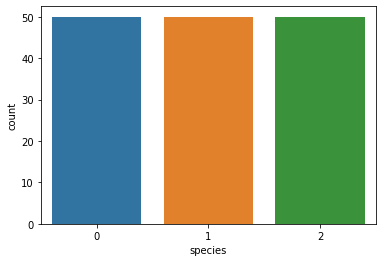

In [21]:
sns.countplot(df['species'])

In [27]:
df1 = pd.DataFrame(df['species'])

## Box plot for anamoly detection or outliers

<AxesSubplot:>

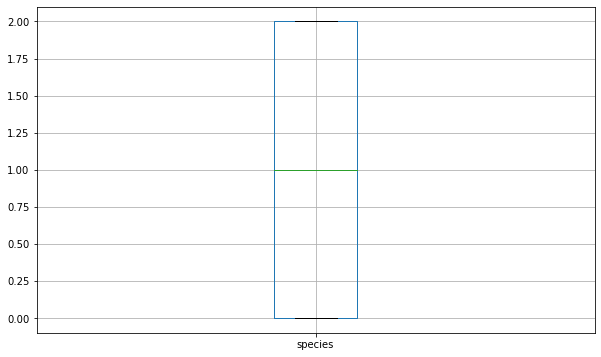

In [42]:
plt.figure(figsize = (10,6))
df1.boxplot()

## Data split into feature and target variable

In [38]:
x = df.iloc[:,:-1]
y = pd.DataFrame(df.iloc[:,-1])

In [39]:
y

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


## Import LinearRegression model

In [54]:
from sklearn.linear_model import LogisticRegression

In [56]:
x_train ,x_test ,y_train ,y_test = train_test_split(x ,y ,test_size = 0.2 ,random_state = 42)

In [57]:
model = LogisticRegression()

## Fit model by training data

In [58]:
model.fit(x_train ,y_train)

C:\Users\Pritam\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

## Prediction output

In [59]:
y_pred = model.predict(x_test)

In [62]:
y_pred = pd.DataFrame(y_pred, columns = (['prediction_output']))

In [63]:
y_pred

,prediction_output
0,1
1,0
2,2
3,1
4,1
5,0
6,1
7,2
8,1
9,1


## Performance matrix or Cost function or Evaluation matrix

In [67]:
from sklearn.metrics import confusion_matrix ,classification_report

In [68]:
print(confusion_matrix(y_test,y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


## Classification report

In [70]:
print(classification_report(y_test ,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

